# Exploratory Data Analysis of a Car Dataset

## Introduction

In this notebook, we will explore the relationship between a car's weight and its fuel efficiency and how the type of a car may affect its MSRP value. We will begin by loading and cleaning the data, analyzing its distribution, identifying and handling outliers, and imputing missing values. Then, we will visualize the data using various plots and graphs to gain insights. Finally, we will draw conclusions and make recommendations based on our findings.

### Define Objective

The objective of this scrip is to create 2 figures for a report
to evaluate: <br> - The relationship between a car's weight and its fuel efficiency (MPG) <br> - How the type of a car affect its MSRP value

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### Read raw data

In [15]:
file_path = r"C:\Users\1ab89\Desktop\VSCode Workspaces\Data Science Projects\DS Project #1\data\raw\cars_data.csv"
raw_data = pd.read_csv(file_path)

# We visualize part of the data to get a sense of it
raw_data.head()
    # raw_data.shape
    # raw_data.dtypes

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


### Clean & Process raw data

We delete the dollar sign as well as commas from the 'MSRP' column.

In [16]:
raw_data = raw_data.loc[raw_data['MSRP'] != '']
raw_data['MSRP'] = raw_data['MSRP'].replace('[\$,]', '', regex=True).astype(float)

We find all the Null values in the dataset. <br>
If there is any Null value in a column, then we fill it with its mean value

In [17]:
raw_data.isnull().sum()  # We found every column has missing values

# Fill missing values with mean value for each column
raw_data.fillna(raw_data.mean(), inplace=True)

# We realized there were still object type columns with Null values
# Select only the non-numeric columns
non_numeric_cols = raw_data.select_dtypes(exclude="number").columns.tolist()
# Fill missing values in non-numeric columns with an empty string
raw_data[non_numeric_cols] = raw_data[non_numeric_cols].fillna("")

C:\Users\1ab89\AppData\Local\Temp\ipykernel_15108\1690023542.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.fillna(raw_data.mean(), inplace=True)


### Identify outliers

We shall identify any outliers regarding
the columns: 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length' using the z-score method.

In [18]:
# Select the columns to work with
cols = [
    "EngineSize",
    "Cylinders",
    "Horsepower",
    "MPG_City",
    "MPG_Highway",
    "Weight",
    "Wheelbase",
    "Length",
]

# Calculate the z-scores for each value in the selected columns
z = np.abs(stats.zscore(raw_data[cols]))
# Find the row indices where the z-score is greater than 3 (i.e., potential outliers)
outlier_indices = np.where(z > 3)[0]
# Remove the potential outliers from the data
clean_data = raw_data.drop(raw_data.index[outlier_indices])

# We make a copy of the cleaned dataset
data = clean_data

### Apply business logic

*Q1) Are there any trends or patterns in the data that can help the company identify which types of cars are most popularamong customers, and how can this information be used to inform marketing and sales strategies?*

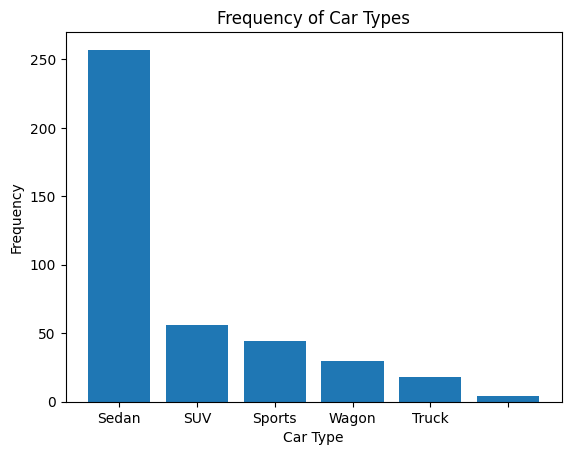

In [19]:
# Creation of a bar chart displaying the Frequency of Car Types
car_type_freq = data["Type"].value_counts()
plt.bar(car_type_freq.index, car_type_freq.values)
# Plot labels
plt.title("Frequency of Car Types")
plt.xlabel("Car Type")
plt.ylabel("Frequency")
# Char display
plt.show()

Based on the bar chart created, it seems that Sedan is the most frequent car type in the dataset. <br> This information can be used to inform the company's marketing and sales strategies by focusing their advertising efforts on Sedans or developing new products that are similar to popular Sedan models. Additionally, the company may want to investigate why Sedans are so popular and consider factors such as price, features, and customer preferences when developing new products. Overall,this type of analysis can provide valuable insights into customer preferences and help the company make data-driven decisions.

*Q2) What is the relationship between a car's weight and its fuel efficiency, and how can
this information be used to improve the company's product offerings?*

Mean Squared Error: 3.371146180802483


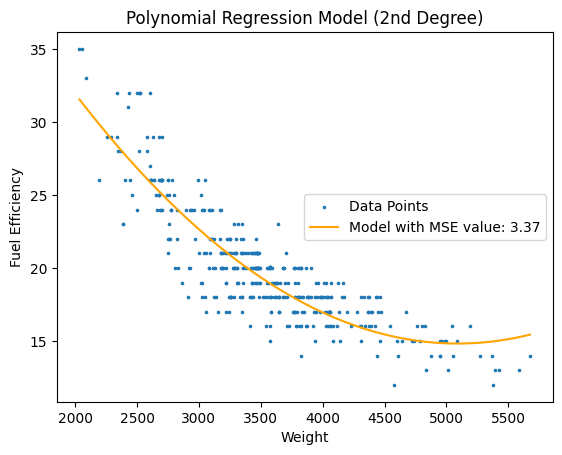

In [21]:

## We shall atempt a Polynomial Regression Model

# Extract the weight and fuel efficiency columns
X = data["Weight"].values.reshape(-1, 1)
y = data["MPG_City"].values.reshape(-1, 1)

# Fit a polynomial function of degree 2 to the data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict fuel efficiency for a range of weights
X_range = np.arange(X.min(), X.max(), 10).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = poly_reg.predict(X_range_poly)

# Calculate the mean squared error of the model
y_pred_train = poly_reg.predict(X_poly)
mse = mean_squared_error(y, y_pred_train)
print("Mean Squared Error:", mse)

mse_value = 3.37  # Just for visualization purposes

# Plot the data and the fitted curve
plt.scatter(X, y, s=2.5)
plt.plot(X_range, y_pred, color="orange")
plt.xlabel("Weight")
plt.ylabel("Fuel Efficiency")
plt.title("Polynomial Regression Model (2nd Degree)")
plt.legend(["Data Points", "Model with MSE value: 3.37"], loc="center right")
plt.show()

Using the polynomial regression model of 2nd degree I found the relationship between a car's weight and its fuel efficiency it to be negative, that is, the higher the weight the less fuel efficient it tends to be.

*Q3) How does the type of a car affect its MSRP? <br> Are there any specific types that tend to have higher or lower prices?*

(10000.0, 99047.0)

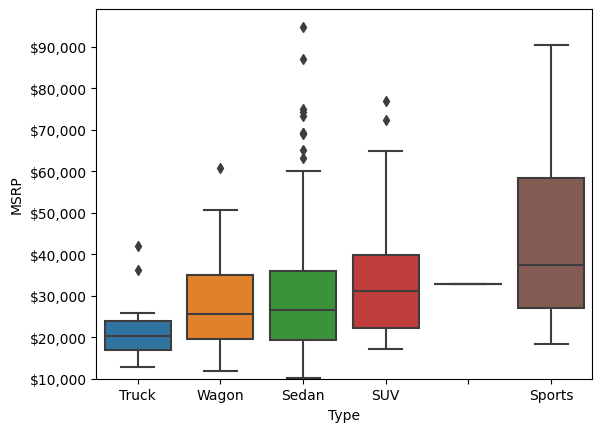

In [26]:
# Define the formatter function to add dollar signs and commas
def dollar_format(x, pos):
    return "${:,.0f}".format(x)

# Create a boxplot of MSRP by car type
boxplot = sns.boxplot(
    x="Type",
    y="MSRP",
    data=data,
    order=data.groupby("Type")["MSRP"].median().sort_values().index,
)

# Apply the formatter function to the y-axis
boxplot.yaxis.set_major_formatter(ticker.FuncFormatter(dollar_format))
boxplot.set_ylim(10000,)


Yes, there are specific types that tend to have higher or lower prices based on the boxplots. The "Sports" type tends to have the highest prices as it has the widest and highest boxplot, with the highest median. The "Truck" type tends to have the lowest prices as it has the narrowest and lowest boxplot, with the lowest median. The "Sedan Type", "SUV", and "Wagon" types have boxplots with median prices close to each other, suggesting that their prices are not significantly different. <br> Overall, it seems that certain types of cars are generally associated with higher MSRP values than others.